In [1]:
import pandas as pd
import numpy as np

In [2]:
# 定義日期區間
start = "2018-01-01"
end = "2024-08-31"

# 定義初始投資金額
portfolio_value = 1000000

# 定義資產代號
stock = '006208.TW'
bond = '00687B.TWO'
gold = '00708L.TW'

# 定義資產比重
stock_ratio = 0.6
bond_ratio = 0.2
gold_ratio = 0.2

In [3]:
import yfinance as yf

query = f'{stock} {bond} {gold}'
df_portfolio = yf.download(query, start = start, end = end, group_by = 'ticker')
df_TWII = yf.download("^TWII", start = start, end = end, group_by = 'ticker')

[*********************100%%**********************]  3 of 3 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# 獲取調整後的收盤價
df_portfolio = df_portfolio.xs('Adj Close', axis=1, level=1)
df_TWII = df_TWII[["Adj Close"]]
df_TWII.columns = ['TWII']

In [5]:
# 計算TWII的累積報酬率
cumulative_returns_TWII = (df_TWII / df_TWII.iloc[0]) - 1

In [6]:
# 初始化結果
portfolio_values = []
rebalance_dates = pd.date_range(start=start, end=end, freq='YS')  # YS表示年初
weights = np.array([stock_ratio, bond_ratio, gold_ratio])

for i in range(len(df_portfolio)):    
    # 如果是再平衡日期，重新分配資金 (每年年初)
    if (i == 0) or (df_portfolio.index[i].year != df_portfolio.index[i-1].year):
        allocated_value = portfolio_value * weights
    
    # 計算當日報酬
    daily_return = (df_portfolio.iloc[i] / df_portfolio.iloc[i-1] - 1)
    allocated_value = allocated_value + (allocated_value * daily_return)
    
    # 更新投資組合價值
    portfolio_value = allocated_value.sum()
    portfolio_values.append(portfolio_value)

df_portfolio_values = pd.DataFrame(portfolio_values, index=df_portfolio.index, columns=['Portfolio'])

# 計算累積報酬率
cumulative_returns_portfolio = (df_portfolio_values / df_portfolio_values.iloc[0]) - 1

In [7]:
df_returns = pd.concat([cumulative_returns_portfolio, cumulative_returns_TWII], axis=1)
df_returns.iloc[-1:]

,Portfolio,TWII
Date,,
2024-08-30,0.433339,1.079045


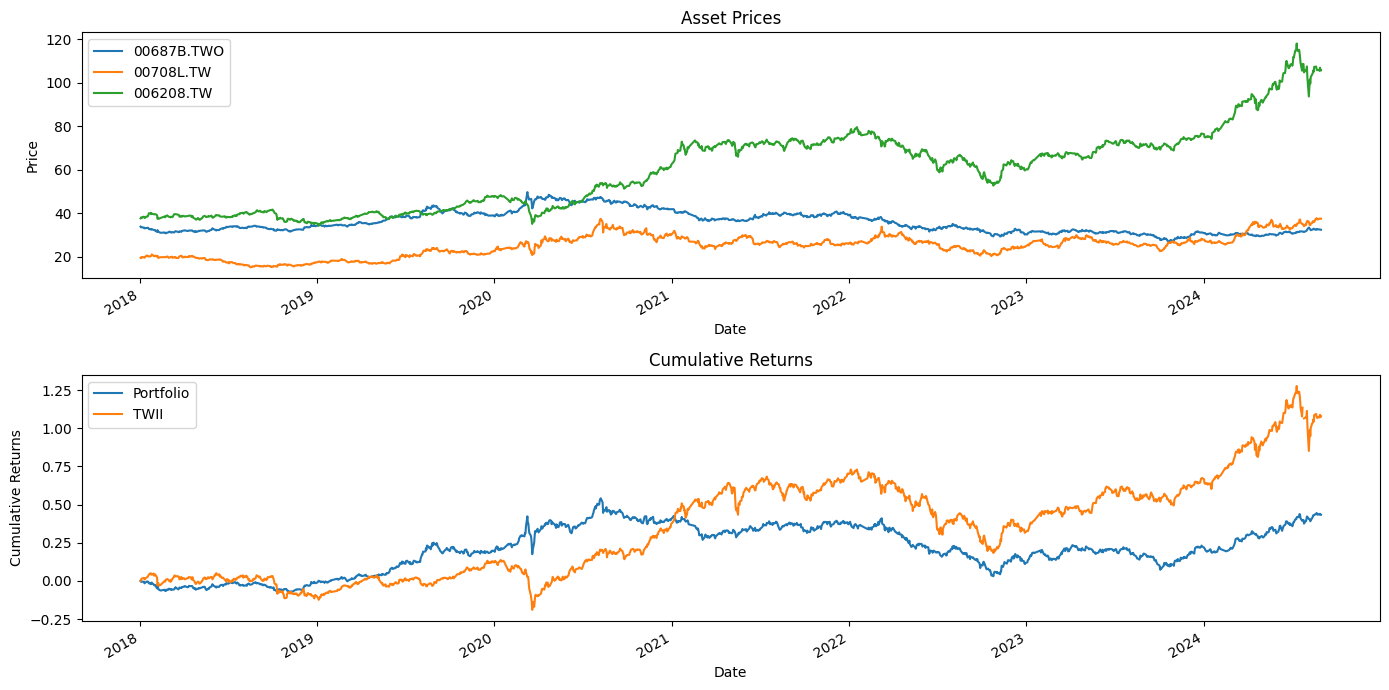

In [8]:
import matplotlib.pyplot as plt

# 繪製股價走勢圖
plt.figure(figsize=(14, 7))

# 三個資產的價格走勢
plt.subplot(2, 1, 1)
df_portfolio.plot(ax=plt.gca())
plt.title('Asset Prices')
plt.ylabel('Price')

# 投資組合的累積回報
plt.subplot(2, 1, 2)
df_returns.plot(ax=plt.gca())
plt.title('Cumulative Returns')
plt.ylabel('Cumulative Returns')

plt.tight_layout()
plt.show()